### Tabela 1 - Você toca instrumento musical

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Toca_instrumento,,,
Sim,19,63.33,19
Não,11,36.67,30


### Tabela 2 - Gênero musical para concentração

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Genero_musical,,,
Pop,10,33.33,10
Não ouço música para me concentrar,8,26.67,18
Instrumental,4,13.33,22
Clássica,3,10.00,25
Rock,3,10.00,28
Lo-fi,2,6.67,30


### Tabela 3 - Influência da música na concentração

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Influencia_musical,,,
"Sim, de forma significativa",13,43.33,13
Nunca toquei instrumento,9,30.00,22
Não percebo diferença,6,20.00,28
Um pouco,2,6.67,30


### Estatísticas para: Horas ouvindo música por semana

,Valor
Média,10.50
Mediana,8.00
Moda,2.00
Desvio Padrão,11.21


### Estatísticas para: Horas com foco total por semana

,Valor
Média,20.00
Mediana,9.00
Moda,8.00
Desvio Padrão,18.66


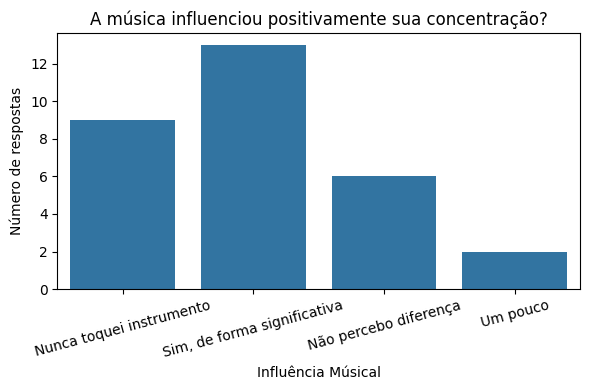

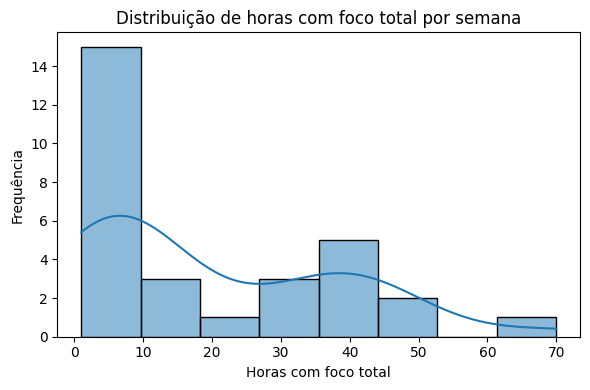

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display, Markdown

# Exportando o CSV direto do Google Planilhas
url = 'https://docs.google.com/spreadsheets/d/1tGR-cB51YpxaUpXENF64f01QeTjlOV0jMhijXqowbiw/export?format=csv'
df = pd.read_csv(url)

# Renomeando colunas dinamicamente com base em palavras-chave
def renomear_coluna_por_parte(parte, novo_nome):
    for col in df.columns:
        if parte.lower() in col.lower():
            df.rename(columns={col: novo_nome}, inplace=True)
            break

renomear_coluna_por_parte("instrumento musical?", "Toca_instrumento")
renomear_coluna_por_parte("frequência você pratica", "Frequência_prática")
renomear_coluna_por_parte("quanto tempo você toca", "Tempo_prática")
renomear_coluna_por_parte("avaliaria sua capacidade de concentração", "Nota_concentracao")
renomear_coluna_por_parte("influenciou positivamente", "Influencia_musical")
renomear_coluna_por_parte("tipo de música você costuma ouvir", "Genero_musical")
renomear_coluna_por_parte("horas por semana você costuma ouvir música", "Horas_ouvindo")
renomear_coluna_por_parte("horas por semana você estuda", "Horas_foco")

# Extraindo valores
def extrair_numero(texto):
    if pd.isna(texto):
        return None
    numeros = re.findall(r'\d+', str(texto))
    return int(numeros[0]) if numeros else None

df['Horas_ouvindo_num'] = df['Horas_ouvindo'].apply(extrair_numero)
df['Horas_foco_num'] = df['Horas_foco'].apply(extrair_numero)

# Gerando as Tabelas de Frequência
def gerar_tabela_frequencia(serie):
    freq_abs = serie.value_counts()
    freq_rel = round((freq_abs / len(serie)) * 100, 2)
    freq_acu = freq_abs.cumsum()
    return pd.DataFrame({
        'Frequência Absoluta': freq_abs,
        'Frequência Relativa (%)': freq_rel,
        'Frequência Acumulada': freq_acu
    })

# Exibindo tabela com título formatado
def exibir_tabela_com_titulo(titulo, tabela):
    display(Markdown(f"### {titulo}"))
    display(tabela)

# Exibindo as tabelas de frequência com display
exibir_tabela_com_titulo("Tabela 1 - Você toca instrumento musical", gerar_tabela_frequencia(df['Toca_instrumento']))
exibir_tabela_com_titulo("Tabela 2 - Gênero musical para concentração", gerar_tabela_frequencia(df['Genero_musical']))
exibir_tabela_com_titulo("Tabela 3 - Influência da música na concentração", gerar_tabela_frequencia(df['Influencia_musical']))

# Estatísticas descritivas
def estatisticas_basicas(col, nome):
    stats = {
        "Média": round(col.mean(), 2),
        "Mediana": round(col.median(), 2),
        "Moda": col.mode().values[0] if not col.mode().empty else "N/A",
        "Desvio Padrão": round(col.std(), 2)
    }
    display(Markdown(f"### Estatísticas para: {nome}"))
    display(pd.DataFrame(stats, index=["Valor"]).T)

# Exibindo estatísticas
estatisticas_basicas(df['Horas_ouvindo_num'], 'Horas ouvindo música por semana')
estatisticas_basicas(df['Horas_foco_num'], 'Horas com foco total por semana')

# Gerando o Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Influencia_musical')
plt.title("A música influenciou positivamente sua concentração?")
plt.ylabel("Número de respostas")
plt.xlabel("Influência Músical")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Gerando o Histograma
plt.figure(figsize=(6,4))
sns.histplot(df['Horas_foco_num'].dropna(), bins=8, kde=True)
plt.title("Distribuição de horas com foco total por semana")
plt.xlabel("Horas com foco total")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()
